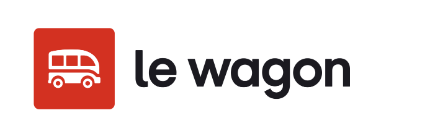

# Inside Airbnb

## Walking through the data with Python


## Import libraries

In [1]:
# Import the libraries we are going to use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/Users/naylla/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Import

**IMPORTANT!**
Before starting download the [csv](https://drive.google.com/file/d/14USM7iXqZhMekUpGQkuTphqXQkLs7dC3/view) that we are going to use during the workshop, you must save it in a folder on your Google Drive where your notebook will also be located

In [3]:
# Load the dataset

data_raw = pd.read_csv("data_cleaned.csv")

Let's check the data

In [5]:
# Display the first few rows of the dataframe to understand its structure

data_raw.head(10)

,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_id,host_response_time,review_scores_rating
0,3109,Observatoire,48.83191,2.31870,Entire home/apt,150.0,4,2019-10-24,0.05,1,327,3631,within a few hours,5.00
1,5396,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,146.0,374,2023-12-11,2.12,2,0,7903,within an hour,4.59
2,7397,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140.0,343,2023-11-16,2.22,7,198,2626,within an hour,4.73
3,7964,Opéra,48.87417,2.34245,Entire home/apt,180.0,5,2015-09-14,0.03,1,25,22155,NaN,4.80
4,9359,Louvre,48.86006,2.34863,Entire home/apt,75.0,0,NaN,NaN,1,185,28422,NaN,NaN
5,9952,Popincourt,48.86373,2.37093,Entire home/apt,130.0,49,2023-09-24,0.37,1,169,33534,within a few hours,4.92
6,10586,Buttes-Montmartre,48.88700,2.34531,Entire home/apt,80.0,51,2023-07-05,0.30,3,102,37107,within a day,4.85
7,81106,Entrepôt,48.88440,2.36091,Entire home/apt,110.0,66,2023-11-12,0.43,1,53,439130,within a few hours,4.84
8,10588,Buttes-Montmartre,48.88725,2.34518,Entire home/apt,75.0,22,2022-12-16,0.14,3,216,37107,within a day,4.90
9,11265,Buttes-Montmartre,48.88494,2.33997,Entire home/apt,145.0,30,2023-10-02,0.33,1,18,41718,NaN,4.90


In [6]:
#Check the number of rows and columns. Use .shape

data_raw.shape

(74329, 14)

In [7]:
#What type of data do we get while using .shape? use .type()

data_raw.dtypes

id                                  int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
host_id                             int64
host_response_time                 object
review_scores_rating              float64
dtype: object

In [11]:
#If we wanted to only show the number of rows, how could I do it? use .shape

data_raw.shape

(74329, 14)

In [9]:
# To have more information about each column we can use .info()

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74329 entries, 0 to 74328
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              74329 non-null  int64  
 1   neighbourhood                   74329 non-null  object 
 2   latitude                        74329 non-null  float64
 3   longitude                       74329 non-null  float64
 4   room_type                       74329 non-null  object 
 5   price                           67108 non-null  float64
 6   number_of_reviews               74329 non-null  int64  
 7   last_review                     56438 non-null  object 
 8   reviews_per_month               56438 non-null  float64
 9   calculated_host_listings_count  74329 non-null  int64  
 10  availability_365                74329 non-null  int64  
 11  host_id                         74329 non-null  int64  
 12  host_response_time              

In [10]:
# or even .describe()

data_raw.describe()

,id,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_id,review_scores_rating
count,7.432900e+04,74329.000000,74329.000000,67108.000000,74329.000000,56438.000000,74329.000000,74329.000000,7.432900e+04,56527.000000
mean,4.016310e+17,48.864441,2.343779,221.161739,23.159897,1.126965,20.321342,105.546032,1.527328e+08,4.689374
std,4.385730e+17,0.018193,0.034027,662.165493,54.741564,1.437668,75.370713,125.189183,1.767908e+08,0.433012
min,3.109000e+03,48.816080,2.224640,8.000000,0.000000,0.010000,1.000000,0.000000,2.750000e+02,0.000000
25%,2.238236e+07,48.851220,2.322240,86.000000,1.000000,0.200000,1.000000,0.000000,1.690631e+07,4.570000
50%,5.139808e+07,48.865740,2.347263,129.000000,6.000000,0.640000,1.000000,45.000000,5.724306e+07,4.810000
75%,8.839130e+17,48.879210,2.369000,205.000000,22.000000,1.540000,2.000000,192.000000,2.681704e+08,5.000000
max,1.044192e+18,48.901670,2.467120,84420.000000,2636.000000,45.850000,628.000000,365.000000,5.503984e+08,5.000000


## Data Cleaning

First let's check the temporality of the data we work on

In [14]:
# Convert 'last_review' to datetime format and find the oldest and most recent dates

data_cleaned = data_raw.copy()

data_cleaned['last_review'] = pd.to_datetime(data_cleaned['last_review'])

min_date = data_cleaned['last_review'].min()
max_date = data_cleaned['last_review'].max()

# Look for the first and last date recorded in the dataframe using .max() .min()

#YOUR CODE
print(min_date, max_date)

2010-05-28 00:00:00 2023-12-13 00:00:00


Check for missing values in key columns

In [15]:
# Check for missing values in key columns

data_cleaned.isnull().sum()

id                                    0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              7221
number_of_reviews                     0
last_review                       17891
reviews_per_month                 17891
calculated_host_listings_count        0
availability_365                      0
host_id                               0
host_response_time                30106
review_scores_rating              17802
dtype: int64

List all column names to ensure accurate references in analysis scripts

In [16]:
# List all column names to ensure accurate references in analysis scripts

data_raw.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'host_id',
       'host_response_time', 'review_scores_rating'],
      dtype='object')

Do you want to keep all columns?

In [18]:
# Delete the columns that we do not want to keep

data_cleaned.dropna(subset=['price','last_review', 'reviews_per_month','review_scores_rating'], inplace = True)

## Exploratory Data Analysis (EDA)

#### **Room Type Distribution**

Airbnb hosts can list entire homes/apartments, private, shared rooms, and more recently hotel rooms.

 How many types of accomodation do we have in the dataset?

In [19]:
# Calculate the number of listings per room type

number_of_listings = data_cleaned['room_type'].value_counts()
number_of_listings

Entire home/apt    46194
Private room        5452
Hotel room           578
Shared room          266
Name: room_type, dtype: int64

In [29]:
# Calculate the distribution of listings by room type
distribution_room_type = data_cleaned['room_type'].value_counts(normalize = True)*100
distribution_room_type

Entire home/apt    88.005334
Private room       10.386740
Hotel room          1.101162
Shared room         0.506763
Name: room_type, dtype: float64

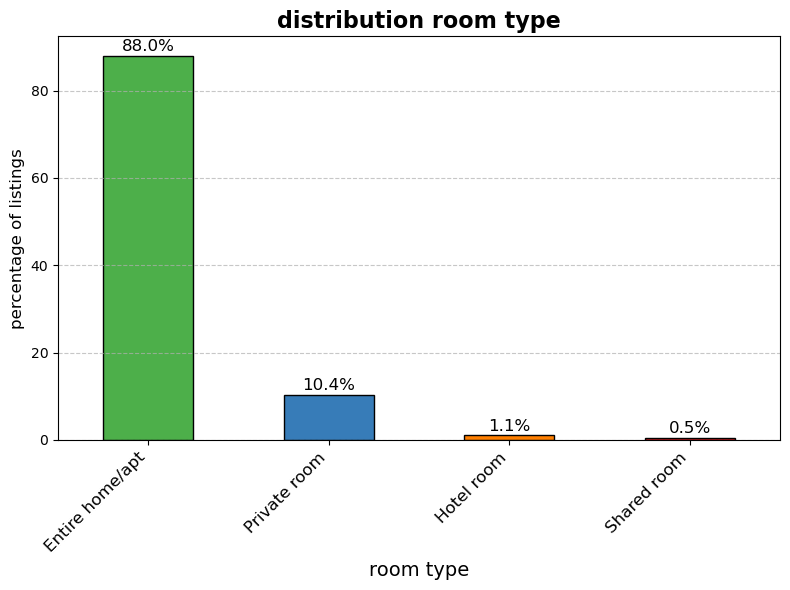

In [32]:
# Plotting the distribution of room types

plt.figure(figsize=(8,6))
colors = ['#4daf4a', '#377cb8', '#ff7f00', '#e41a1c'] 

#Create bar chart
distribution_room_type.plot(kind = 'bar', color=colors, edgecolor= 'black')

#Add title and labels
plt.title('distribution room type', fontsize=16, fontweight= 'bold')
plt.xlabel('room type', fontsize=14)
plt.ylabel('percentage of listings', fontsize=12)

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show percentage values on top of each bar
for index, value in enumerate(distribution_room_type):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12)
    
# Add a grid for visual aid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
# Calculate the number of unique neighborhoods

data_cleaned.neighbourhood.nunique()

20

In [36]:
# Calculate listings count for each neighbourhood and sort in ascending order by count

listings_per_neighbourhoods = data_cleaned['neighbourhood'].value_counts(ascending=False)

# Sort the counts in ascending order
listings_per_neighbourhoods_sorted = listings_per_neighbourhoods.sort_values(ascending=True)
listings_per_neighbourhoods_sorted

Louvre                 1280
Palais-Bourbon         1433
Luxembourg             1504
Élysée                 1591
Gobelins               1716
Panthéon               1761
Hôtel-de-Ville         1809
Observatoire           1914
Bourse                 1978
Reuilly                2041
Temple                 2517
Opéra                  2578
Passy                  2645
Ménilmontant           2961
Buttes-Chaumont        3038
Batignolles-Monceau    3242
Vaugirard              3860
Entrepôt               3860
Popincourt             4868
Buttes-Montmartre      5894
Name: neighbourhood, dtype: int64

#### **Pricing**

What are the revenue and occupancy rates across different scopes? Can we identify pricing trends?

How much does the average person pay to stay in Paris?

In [23]:
#Calculating the mean rental price

data_cleaned.price.mean()

182.72057534768527

Do you consider it is a good way to approximate the average price? Could we do it in a better way?

In [26]:
# Grouping the data by neighborhood and calculate the average price

average_price_per_neighbourhoods = data_cleaned.groupby('neighbourhood')['price'].mean()
average_price_per_neighbourhoods

neighbourhood
Batignolles-Monceau    163.629241
Bourse                 227.313448
Buttes-Chaumont        132.551679
Buttes-Montmartre      137.771463
Entrepôt               162.519171
Gobelins               167.185315
Hôtel-de-Ville         221.131012
Louvre                 271.741406
Luxembourg             258.580452
Ménilmontant           115.588990
Observatoire           151.520376
Opéra                  209.331265
Palais-Bourbon         269.819260
Panthéon               206.512209
Passy                  247.796975
Popincourt             152.281635
Reuilly                144.048506
Temple                 224.767978
Vaugirard              180.109845
Élysée                 296.202388
Name: price, dtype: float64

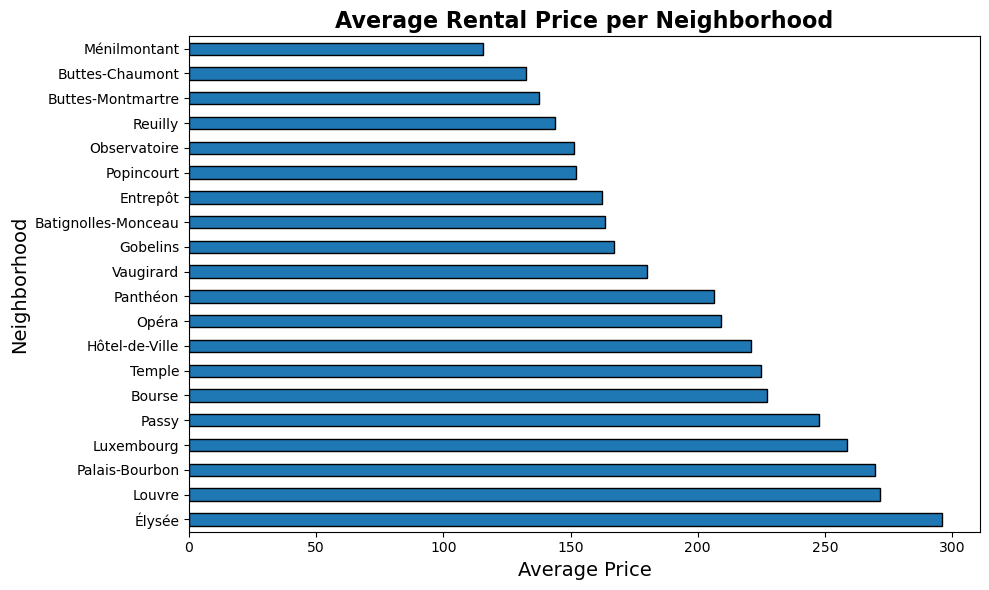

In [39]:
# Plotting the average price per neighborhood

# Plotting the average price per neighborhood
plt.figure(figsize=(10, 6))

# Sort by price for better visualization
average_price_per_neighborhoods_sorted = average_price_per_neighbourhoods.sort_values(ascending=False)

# Create bar chart
average_price_per_neighborhoods_sorted.plot(kind='barh', color='#1f77b4', edgecolor='black')

# Add titles and labels
plt.title('Average Rental Price per Neighborhood', fontsize=16, fontweight='bold')
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Let's calculate the average price by room type

In [41]:
# Group by 'room_type' and calculate the average price

average_price_per_room_type = data_cleaned.groupby('room_type')['price'].mean()

# Rename columns for clarity
data_cleaned = data_cleaned.rename(columns={'price': 'daily_rental_price'})
average_price_per_room_type.sort_values()

room_type
Shared room         63.233083
Private room       136.183419
Entire home/apt    187.921462
Hotel room         261.015571
Name: price, dtype: float64

#### **Identifying High-Performing Listings**

Which listings in Airbnb's portfolio perform the best in terms of occupancy rates, revenue generation, and guest satisfaction?

**Host revenue generation**

Some Airbnb hosts have multiple listings.

A host may list separate rooms in the same apartment, or multiple apartments or homes available in their entirety.

Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property.

Imagine that we want to know how much the 10 hosts that earn the most per year earn.

In [46]:
# Create a new column 'potential_revenue' and calculate the potential annual revenue for each listing

#YOUR CODE
data_cleaned['potetional_revenue'] = data_cleaned['daily_rental_price']*365

# Now, group by 'host_id' and sum up the potential revenue
host_revenue = data_cleaned.groupby('host_id')['potetional_revenue'].sum()

# Display the results
top_10_hosts = host_revenue.sort_values(ascending=False).head(10)
top_10_hosts


host_id
33889201     64218100.0
26981054     22552985.0
277316912    20335610.0
77779136     19432235.0
7642792      19047160.0
50502817     14360560.0
50978178     13891170.0
335998296    13830580.0
51567288     12001200.0
33264663     10950000.0
Name: potetional_revenue, dtype: float64

**Distribution of Listings per Host**

Apartment - how many apartments does each host own?

We'll use the *host_id* and *id*  to count how many listings each host manages.

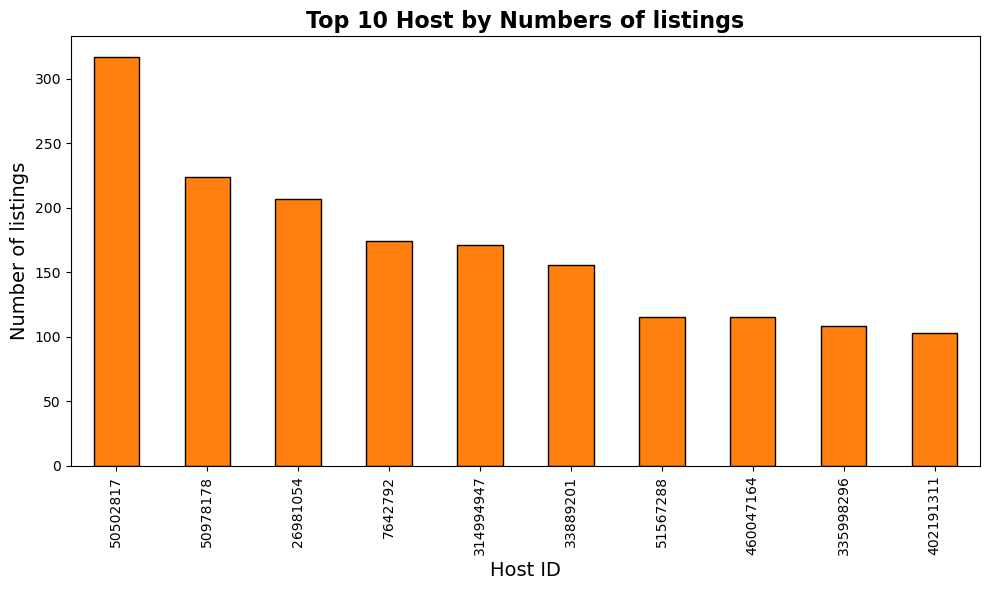

In [53]:
# Counting listings per host

# Group by 'host_id' and count the number of listings
listings_per_host = data_cleaned.groupby('host_id')['id'].count()

# Rename the result to make it clear
listings_per_host = listings_per_host.rename('listings_count')

# For a more informative chart, we limit the visualization to the top 10 hosts
# Sort by listing count in descending order and get the top 10 hosts
top10_host_by_listings = listings_per_host.sort_values(ascending=False).head(10)

# Plot the top 10 hosts by listing count
plt.figure(figsize=(10, 6))
top10_host_by_listings.plot(kind='bar', color='#ff7f0e', edgecolor='black')

# Add titles and labels
plt.title('Top 10 Host by Numbers of listings', fontsize=16, fontweight='bold')
plt.xlabel('Host ID', fontsize=14)
plt.ylabel('Number of listings', fontsize=14)

#Show the plot
plt.tight_layout()
plt.show()

What if we create a combined performance metric based on review scores and number of reviews ?

In [24]:
# Create a combined performance metric based on review scores and number of reviews

#YOUR CODE

# Group by host and calculate average performance

#YOUR CODE

# Identify top-performing hosts

#YOUR CODE

In [25]:
# Visualizing the top host performance

#YOUR CODE

and if we create a new perfomance indicator assuming bookings as a measure of performance ?

In [26]:
# Calculate assumed bookings as a measure of performance

#YOUR CODE

# Evaluate host performance by revenue and reviews

#YOUR CODE

# Top-performing hosts

#YOUR CODE

In [27]:
# Visualization of host performance metrics

#YOUR CODE

Is there a relationship between guest satisfaction and the host reponse time?

In [28]:
# Rename column 'review_scores_rating' as it seems to represent the intended 'review_scores_value'

#YOUR CODE

# Plotting the boxplot

#YOUR CODE

Is there a difference between host satisfaction and the type of room?

In [29]:
# Analyze review scores by room type for patterns

#YOUR CODE

# Rename columns for clarity

#YOUR CODE

#### **Seasonal Demand Analysis**
How does seasonal demand impact Airbnb's rental properties?

Analyze booking patterns (using number of reviews as a proxy for bookings) and availability data across different seasons to identify seasonal demand fluctuations.

In [30]:
# Extract the month from the 'last_review' date

#YOUR CODE

# Aggregate data to find average price and count of listings per month

#YOUR CODE

# Plotting

#YOUR CODE


In [31]:
# Pricing adjustments based on seasonality

#YOUR CODE

In [32]:
# Pricing adjustments based on seasonality

#YOUR CODE

In [33]:
# Filter data for the years 2022 only

#YOUR CODE

# Calculate the average daily price for this year

#YOUR CODE

# Attempt to plot the evolution of average daily price for 2022

#YOUR CODE

Let's use another library to answer the same question

In [34]:
# Filter for 2022

#YOUR CODE

# Group by date and calculate average price

#YOUR CODE

# Plot using Plotly Express

#YOUR CODE
